/Users/prathameshmandhare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6746777200034015


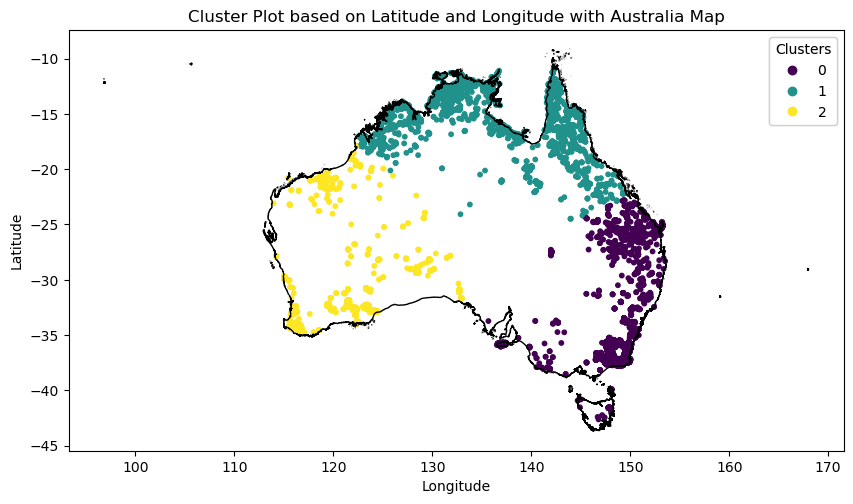

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

australia = gpd.read_file("/Users/prathameshmandhare/Downloads/AUS_2021_AUST_SHP_GDA2020/AUS_2021_AUST_GDA2020.shp")

data = pd.read_csv("/Users/prathameshmandhare/Downloads/wildfire95.csv")

# Assuming X is data
X = data[['latitude', 'longitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict clusters for the entire dataset
y_pred = kmeans.predict(X_scaled)

# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters and Australia's boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot of clusters
scatter = ax.scatter(data['longitude'], data['latitude'], c=y_pred, cmap='viridis', s=10)

# Plot Australia's boundaries
australia.plot(ax=ax, color='none', edgecolor='black')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Plot based on Latitude and Longitude with Australia Map')

# Add a colorbar
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Show the plot
plt.show()

In [7]:
# Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.673145943823864
